<a target="_blank" href="https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/main/stats/Maximum_Likelihood_Estimation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?

In [5]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)
mu_true = 3
s_true  = 2
samples = 500

sample_data = np.random.logistic(loc=mu_true, scale=s_true, size=samples)

def logistic_nll(params):
    mu = params[0]
    s  = params[1]

    if s <= 0:
        return np.inf

    nll = -np.sum(stats.logistic.logpdf(sample_data, loc=mu, scale=s))
    return nll

initParams = [0, 1]


results = minimize(logistic_nll, initParams, method='Nelder-Mead')

# Print results

print("Estimated mu  = {:.3f}".format(results.x[0]))
print("Estimated s   = {:.3f}".format(results.x[1]))
print("True mu       = {:.3f}".format(mu_true))
print("True s        = {:.3f}".format(s_true))

Estimated mu  = 3.099
Estimated s   = 2.110
True mu       = 3.000
True s        = 2.000


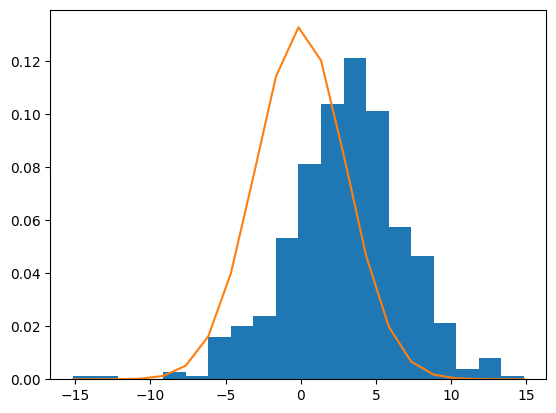

In [6]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()